In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm, trange
import math

(72, 72)


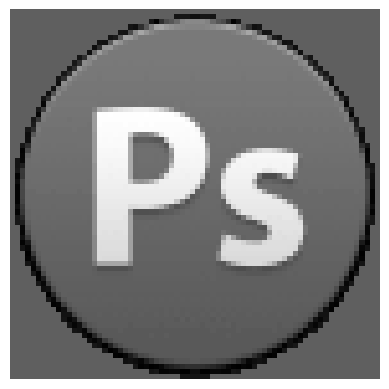

In [2]:
I = cv2.imread("icon01.png", 0)
plt.imshow(I, cmap = "gray");plt.axis("off")
print(I.shape)

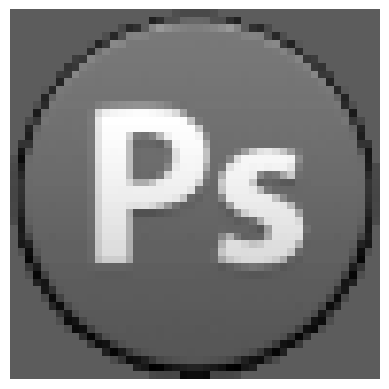

In [3]:
I = cv2.resize(I,(48, 48))
plt.imshow(I, cmap = "gray");plt.axis("off")

In [26]:
def DFT(arr):
    width, height = arr.shape
    array = np.copy(arr)    
    new_img = np.zeros_like(arr, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    new_img[row, column] += (array[x, y] * np.exp(-2j * np.pi * ((row  *  x  / width ) + (column * y / height)))) / (width * height)
    return new_img
new_img = DFT(I)

  0%|          | 0/48 [00:00<?, ?it/s]

In [27]:
def IDFT(arr):
    width, height = arr.shape
    array = np.copy(arr)    
    i_new_img = np.zeros_like(I, dtype = np.complexfloating)
    for row in trange(width):
        for column in range(height):
            for x in range(width):
                for y in range(height):
                    i_new_img[row, column] += array[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 
    return i_new_img
i_new_img = IDFT(new_img)

  0%|          | 0/48 [00:00<?, ?it/s]

In [6]:
def energy_Top_Left (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[value:] = 0
    new_restructor[...,value:] = 0
    return new_restructor

**Invese DFT by restructed 5, 10, 30 and 35 respectly pixel**

In [7]:
img_5 = energy_Top_Left(new_img, 5)
i_new_img_5 = IDFT(img_5)
img_10= energy_Top_Left(new_img, 10)
i_new_img_10 = IDFT(img_10)
img_30 = energy_Top_Left(new_img, 30)
i_new_img_30 = IDFT(img_30)
img_35 = energy_Top_Left(new_img, 35)
i_new_img_35 = IDFT(img_35) 

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

In [8]:
def energy_Bottm_Right (arr, value):
    
    new_restructor = np.copy(arr)
    new_restructor[:-value] = 0
    new_restructor[...,:-value] = 0
    return new_restructor

**Invese DFT by restructed 10 pixel Bottm Right**

In [28]:
img_10b = energy_Bottm_Right(new_img, 10)
i_new_img_10b = IDFT(img_10b)
img_25 = energy_Bottm_Right(new_img, 25)
i_new_img_25 = IDFT(img_25)
img_40 = energy_Bottm_Right(new_img, 40)
i_new_img_40 = IDFT(img_40)
img_45 = energy_Bottm_Right(new_img, 45)
i_new_img_45 = IDFT(img_45)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

D:\New folder\ipykernel_11912\3133057388.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[0, 1].imshow(i_new_img.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
D:\New folder\ipykernel_11912\3133057388.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 0].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
D:\New folder\ipykernel_11912\3133057388.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 1].imshow(i_new_img_10.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
D:\New folder\ipykernel_11912\3133057388.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 2].imshow(i_new_img_30.astype(np.uint8), cmap = "gray");axes[1, 2].axis("off");axes[1, 2].set_titl

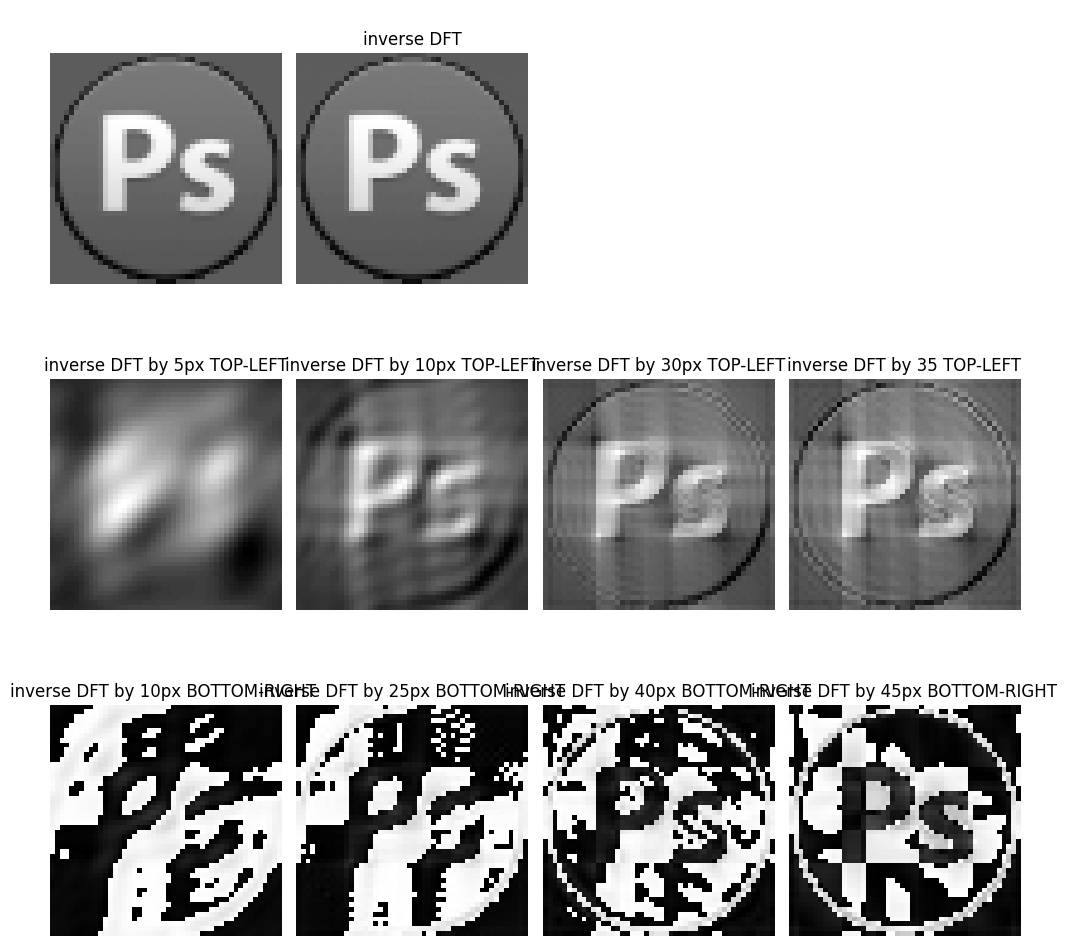

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 2].axis("off")
axes[0, 3].axis("off")
axes[0, 1].imshow(i_new_img.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
axes[1, 0].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
axes[1, 1].imshow(i_new_img_10.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
axes[1, 2].imshow(i_new_img_30.astype(np.uint8), cmap = "gray");axes[1, 2].axis("off");axes[1, 2].set_title("inverse DFT by 30px TOP-LEFT")
axes[1, 3].imshow(i_new_img_35.astype(np.uint8), cmap = "gray");axes[1, 3].axis("off");axes[1, 3].set_title("inverse DFT by 35 TOP-LEFT")
axes[2, 0].imshow(i_new_img_10b.astype(np.uint8), cmap = "gray");axes[2, 0].axis("off");axes[2, 0].set_title("inverse DFT by 10px BOTTOM-RIGHT ")
axes[2, 1].imshow(i_new_img_25.astype(np.uint8), cmap = "gray");axes[2, 1].axis("off");axes[2, 1].set_title("inverse DFT by 25px BOTTOM-RIGHT")
axes[2, 2].imshow(i_new_img_40.astype(np.uint8), cmap = "gray");axes[2, 2].axis("off");axes[2, 2].set_title("inverse DFT by 40px BOTTOM-RIGHT")
axes[2, 3].imshow(i_new_img_45.astype(np.uint8), cmap = "gray");axes[2, 3].axis("off");axes[2, 3].set_title("inverse DFT by 45px BOTTOM-RIGHT")
plt.tight_layout()
plt.show()

In [32]:
def amplitude(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.sqrt(np.add(np.power(R, 2), np.power(Im, 2)))
def phase(arr):
    R = np.real(arr)
    Im = np.imag(arr)
    return np.arctan2(Im, R)

In [15]:
def pos(arr) -> np.array:
    width, heigth = arr.shape
    shift = np.zeros_like(arr//2)
    toUse = np.copy(arr)

    shift = np.copy(toUse[:width//2, :heigth//2])
    toUse[:width//2, :heigth//2] = toUse[width//2:, heigth//2:]
    toUse[width//2:, heigth//2:] = shift

    shift = np.copy(toUse[width//2:, :heigth//2])
    toUse[width//2:, :heigth//2] = toUse[:width//2, heigth//2:]
    toUse[:width//2, heigth//2:] = shift
    return toUse

In [34]:
ampl = amplitude(new_img)
phas = phase(new_img)
newAmplitude = pos(ampl)
logAmpl = np.log(newAmplitude)

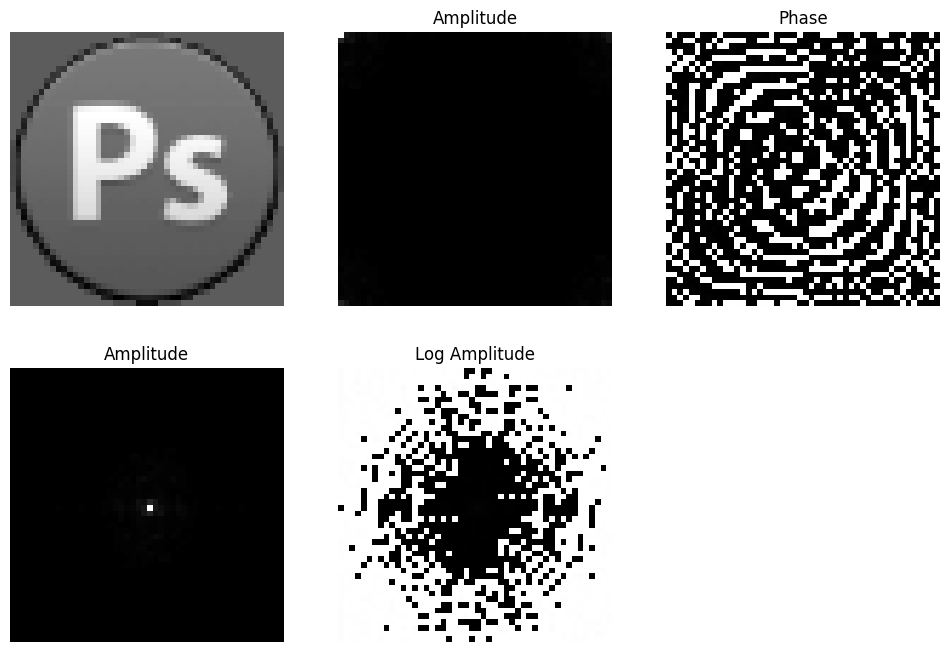

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 1].imshow(ampl.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("Amplitude")
axes[0, 2].imshow(phas.astype(np.uint8), cmap = "gray");axes[0, 2].axis("off");axes[0, 2].set_title("Phase")
axes[1, 0].imshow(newAmplitude.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("Amplitude")
axes[1, 1].imshow(logAmpl.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("Log Amplitude")
axes[1, 2].axis("off")
plt.show()

(72, 72)


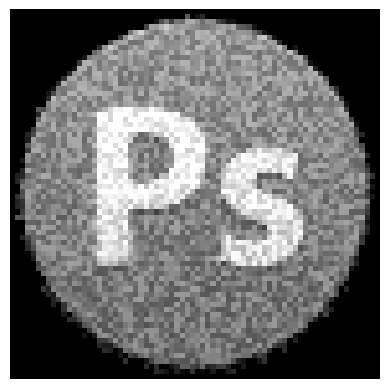

In [41]:
newI = cv2.imread("icon1.png", 0)
plt.imshow(newI, cmap = "gray");plt.axis("off")
print(newI.shape)

(50, 50)

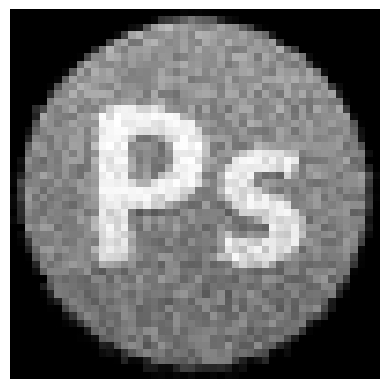

In [42]:
newI = cv2.resize(newI,(50, 50))
plt.imshow(newI, cmap = "gray");plt.axis("off")
newI.shape

In [43]:
ni = DFT(newI)

  0%|          | 0/50 [00:00<?, ?it/s]

In [44]:
ni = IDFT(ni)

  0%|          | 0/50 [00:00<?, ?it/s]

IndexError: index 48 is out of bounds for axis 1 with size 48